## Activité 1

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [3]:
#### Q1
def generate_data(X, theta_star, sigma2):
    n = X.shape[0]
    epsilon = np.random.normal(0, np.sqrt(sigma2), size=n) 
    Y = X @ theta_star + epsilon 
    return Y

In [4]:
#### Q2
np.random.seed(102)  
d = 10  
n = 100  
sigma2 = 1  
theta_star = np.array([10, 1, 5, 2, 8] + [0] * (d - 5)) 

X = np.random.randn(n, d)

Y = generate_data(X, theta_star, sigma2)

lambdas = np.logspace(-2, 4, 50)

In [6]:
X.shape, Y.shape

((100, 10), (100,))

In [38]:
bias_numerical = []
bias_theoretical = []
ecart_numerical = []

def compute_theoretical_bias(X, theta_star, lambd):
    XTX = X.T @ X
    Id = np.eye(X.shape[1])
    inverse_term = np.linalg.inv(XTX + lambd * Id)
    bias = -lambd * inverse_term @ theta_star
    return bias



for lambd in lambdas:
    vec_theta = []
    theta_mean = 0
    theta_std = 0
    for i in range(200):
        Y_ = generate_data(X, theta_star, sigma2)
        ridge = Ridge(alpha=lambd, fit_intercept=False)
        
        ridge.fit(X, Y_)
        vec_theta.append(ridge.coef_)
    vec_theta = np.array(vec_theta)
    theta_mean = np.mean(vec_theta, axis=0)
    
    theta_std = np.std(vec_theta, axis=0)
        
    bias_numerical.append(theta_mean - theta_star)  
    bias_theoretical.append(compute_theoretical_bias(X, theta_star, lambd)) 
    ecart_numerical.append(theta_std)

In [39]:
bias_numerical = np.array(bias_numerical)
bias_theoretical = np.array(bias_theoretical)
ecart_numerical = np.array(ecart_numerical)

In [40]:
bias_numerical.shape

(50, 10)

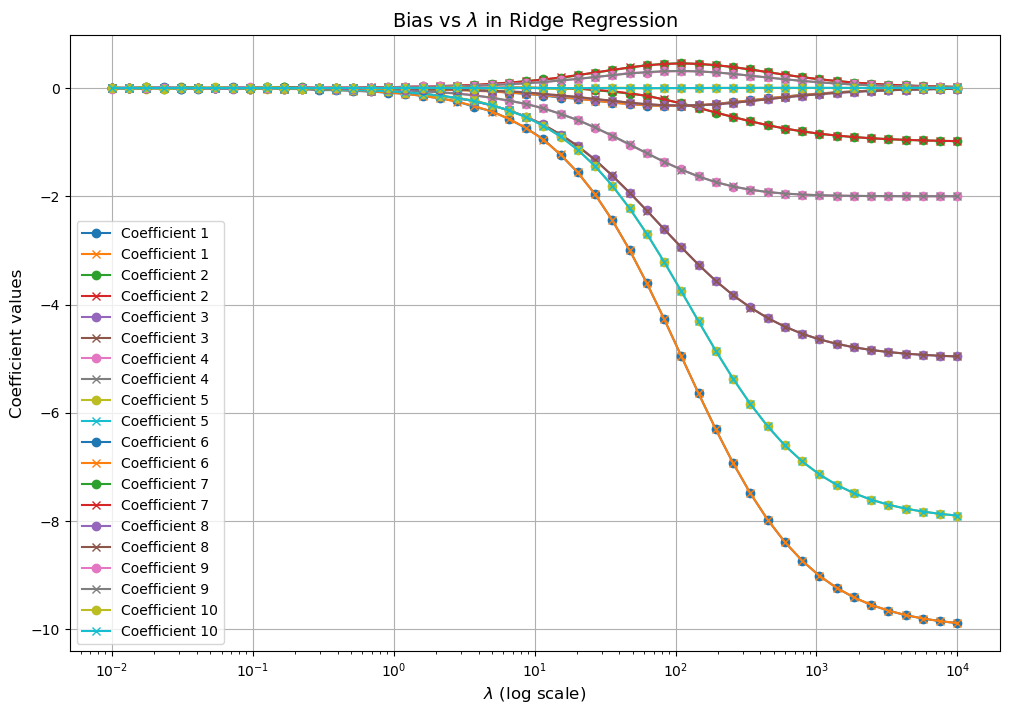

In [41]:
plt.figure(figsize=(12, 8))
for i in range(d):
    plt.plot(lambdas, bias_numerical[:, i], marker='o', linestyle='-', label=f'Coefficient {i+1}')
    plt.plot(lambdas, bias_theoretical[:, i], marker='x', linestyle='-', label=f'Coefficient {i+1}')

#plt.axvline(x=optimal_lambda, color='red', linestyle='--', label=f'λ optimal = {optimal_lambda}')
plt.xscale('log')  
plt.xlabel(r'$\lambda$ (log scale)', fontsize=12)
plt.ylabel('Coefficient values', fontsize=12)
plt.title(r'Bias vs $\lambda$ in Ridge Regression', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Résultat:
Le graphique montre le biais au carré pour chaque coefficient en fonction de 𝜆
λ, comparant le biais théorique au biais numérique.

#### Focus sur la matrice de covariance

<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:44: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_182/2766125290.py:44: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Variance of Coefficient 1 vs $\lambda$ in Ridge Regression', fontsize=14)


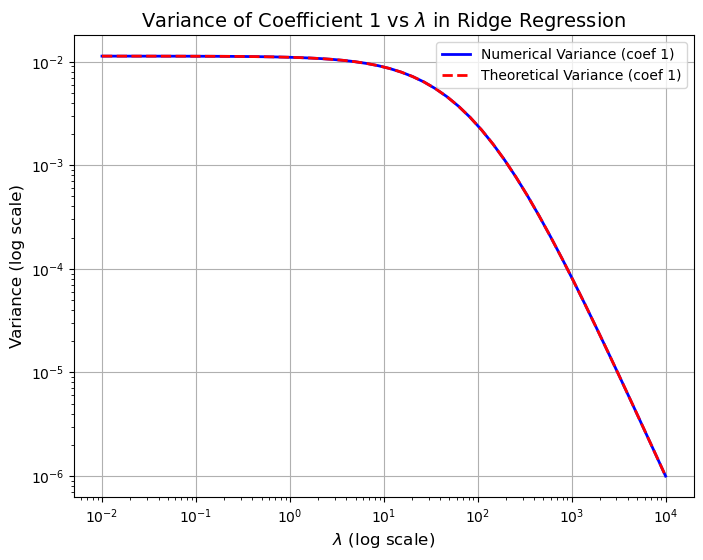

In [7]:
def ridge_covariance(X, lambd, sigma2=1):
    XTX = X.T @ X
    Id = np.eye(X.shape[1])
    inverse_term = np.linalg.inv(XTX + lambd * Id)
    covariance_matrix = sigma2 * inverse_term @ XTX @ inverse_term
    return covariance_matrix

ridge_variances_numerical = []
ridge_variances_theoretical = []

for lambd in lambdas:
    ridge = Ridge(alpha=lambd, fit_intercept=False)
    ridge.fit(X, Y)
    
    covariance_matrix = ridge_covariance(X, lambd, sigma2)
    
    variances_numerical = np.diag(covariance_matrix)
    ridge_variances_numerical.append(variances_numerical)
    
    XTX = X.T @ X
    Id = np.eye(d)
    inverse_term = np.linalg.inv(XTX + lambd * Id)
    covariance_theoretical = sigma2 * inverse_term @ XTX @ inverse_term
    variances_theoretical = np.diag(covariance_theoretical)
    ridge_variances_theoretical.append(variances_theoretical)


plt.figure(figsize=(8, 6))
plt.plot(lambdas, [v[0] for v in ridge_variances_numerical], label='Numerical Variance (coef 1)', color='blue', lw=2)
plt.plot(lambdas, [v[0] for v in ridge_variances_theoretical], label='Theoretical Variance (coef 1)', color='red', linestyle='--', lw=2)
plt.xscale('log')  
plt.yscale('log') 
plt.xlabel(r'$\lambda$ (log scale)', fontsize=12)
plt.ylabel('Variance (log scale)', fontsize=12)
plt.title(r'Variance of Coefficient 1 vs $\lambda$ in Ridge Regression', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.random.seed(102)
d = 10
n = 100
sigma2 = 1
theta_star = np.array([10, 1, 5, 2, 8] + [0] * (d - 5))

X = np.random.randn(n, d)

Y = generate_data(X, theta_star, sigma2)

lambdas = np.logspace(-2, 4, 50)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [53]:
data = pd.read_csv('data_dm3.csv', header=None)
data.columns = [f'X{i+1}' for i in range(data.shape[1]-1)] +  ['Y'] 

X = data.drop(columns=['Y']) 
y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
data.head(1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X202,X203,X204,X205,X206,X207,X208,X209,X210,Y
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.54827,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.41602,-2.332363,0.215096,-0.693319,151.0


Valeur optimale de λ choisie par validation croisée : 62.5055192527397


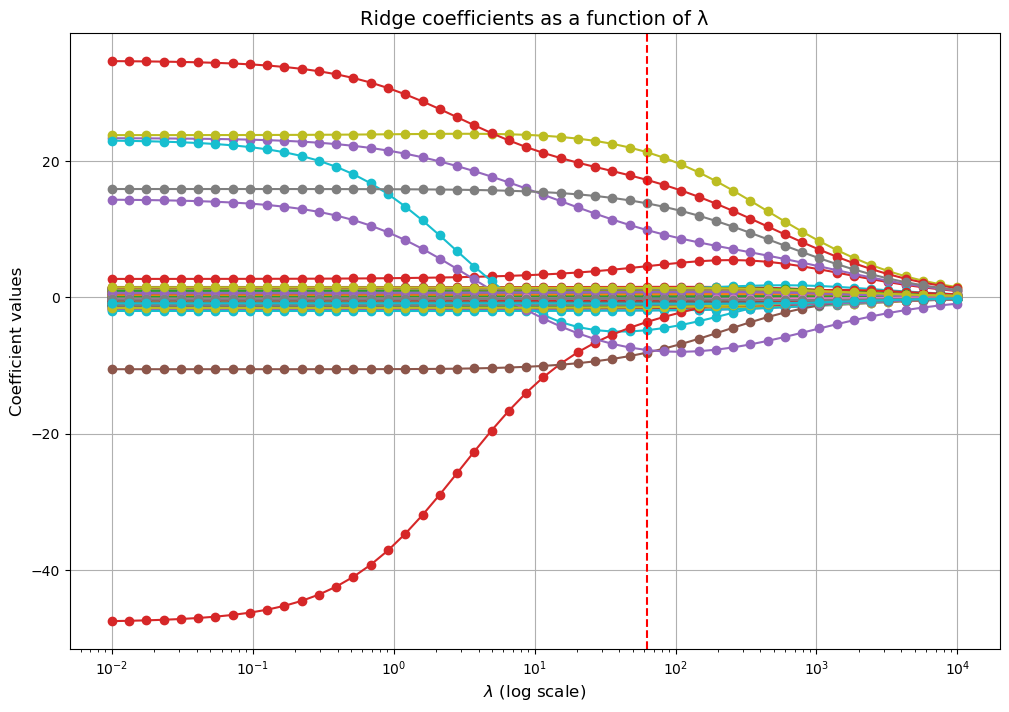

In [57]:
lambdas = np.logspace(-2, 4, 50)  
ridge_cv = RidgeCV(alphas=lambdas) 
ridge_cv.fit(X_train_scaled, y_train)

optimal_lambda = ridge_cv.alpha_

print(f"Valeur optimale de λ choisie par validation croisée : {optimal_lambda}")

coef_list = []

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train_scaled, y_train)
    coef_list.append(ridge.coef_)

coef_list = np.array(coef_list)

plt.figure(figsize=(12, 8))
for i in range(coef_list.shape[1]):
    plt.plot(lambdas, coef_list[:, i], marker='o', linestyle='-', label=f'Coefficient {i+1}')

plt.axvline(x=optimal_lambda, color='red', linestyle='--', label=f'λ optimal = {optimal_lambda}')
plt.xscale('log') 
plt.xlabel(r'$\lambda$ (log scale)', fontsize=12)
plt.ylabel('Coefficient values', fontsize=12)
plt.title('Ridge coefficients as a function of λ', fontsize=14)
#plt.legend()
plt.grid(True)
plt.show()


In [58]:
from sklearn.metrics import mean_squared_error

y_pred = ridge_cv.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")

n_folds = 5 
print(f"Nombre de folds utilisés pour la validation croisée : {n_folds}")

Erreur quadratique moyenne (MSE) sur l'ensemble de test : 2923.7089389517514
Nombre de folds utilisés pour la validation croisée : 5


### Activite 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Q1. Générer le dataset comme dans l'Activité 1
def generate_dataset(X, theta_star, sigma2):
    n, d = X.shape
    epsilon = np.random.normal(0, np.sqrt(sigma2), n)
    y = X @ theta_star + epsilon
    return y

# Génération des données
n, d = 100, 10
X = np.random.randn(n, d)
theta_star = np.array([10, 1, 5, 2, 8, 0, 0, 0, 0, 0])
sigma2 = 1
y = generate_dataset(X, theta_star, sigma2)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Q1. Régression Lasso
lasso = Lasso(alpha=1.0)  # vous pouvez ajuster alpha
lasso.fit(X_scaled, y)

# Calculer le biais et la variance numérique pour Lasso
bias = lasso.coef_ - theta_star
variance = np.var(lasso.coef_)

print("Biais estimé des coefficients (Lasso):", bias)
print("Variance estimée des coefficients (Lasso):", variance)

# Q2. Dataset contaminé (n = 442, d = 210)
# Charger les données contaminées
data = pd.read_csv('data_dm3.csv')
X_contaminated = data.drop(columns=['Y'])
y_contaminated = data['Y']

# Diviser les données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_contaminated, y_contaminated, test_size=0.2, random_state=42)

# Normalisation des données contaminées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Q2. LassoCV avec validation croisée pour choisir la meilleure valeur de lambda
lasso_cv = LassoCV(cv=5, alphas=np.logspace(-2, 4, 50), random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Extraire la meilleure valeur de lambda choisie par validation croisée
optimal_lambda_lasso = lasso_cv.alpha_

print(f"Valeur optimale de λ choisie par validation croisée (Lasso): {optimal_lambda_lasso}")

# Tracer les coefficients en fonction de λ
plt.figure(figsize=(8, 6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle='-', marker='o', label='Coefficients')
plt.axvline(x=optimal_lambda_lasso, color='red', linestyle='--', label=f'λ optimal = {optimal_lambda_lasso}')
plt.xscale('log')
plt.xlabel(r'$\lambda$ (log scale)', fontsize=12)
plt.ylabel('Coefficient values', fontsize=12)
plt.title('Lasso coefficients as a function of λ', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Q3. Évaluer la performance du modèle sur le jeu de test
y_pred_lasso = lasso_cv.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Erreur quadratique moyenne (MSE) avec Lasso sur l'ensemble de test: {mse_lasso}")

# Comparer avec Ridge
# Vous pouvez utiliser le modèle Ridge de l'Activité précédente pour comparer les performances
